<a href="https://colab.research.google.com/github/jerry-simon/Data_Science_And_Machine_Learning/blob/main/Delhivery_Business_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Business Problem

Delhivery is one of India's leading and rapidly growing logistics company, that has set its sights on creating the commerce of operating systems. They achieve this by utilizing world-class infrastructure, ensuring the highest quality in logistics operations, and harnessing cutting-edge engineering and technology capabilities.

Aims of this Business Case study:
> To ensure data integrity and quality by addressing missing values
and structuring the dataset appropriately

> It enables the extraction of valuable features from raw data, which can be
utilized for building accurate forecasting models

> It facilitates the identification of patterns, insights, and actionable
recommendations crucial for optimizing their logistics operations

> By conducting hypothesis testing and outlier detection, Delhivery can refine their
processes and further enhance the quality of service they provide.

## 1. Dataset Summary

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway, shapiro, kruskal, levene, kstest
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind, ttest_rel, skew, kurtosis
from scipy.stats import chisquare, chi2_contingency, pearsonr, spearmanr

In [ ]:
#Reading the delhivery dataset
df = pd.read_csv('delhivery_data.csv')

In [ ]:
#Displaying 10 random samples from the given dataset
df.sample(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
33614,training,2018-09-26 16:02:39.847678,thanos::sroute:eaba08b6-b079-4367-9d9a-5159dae...,FTL,trip-153797775984742472,IND523002AAA,Ongole_SubhVRTL_I (Andhra Pradesh),IND523230AAA,Kanigiri_Tiglgndi_D (Andhra Pradesh),2018-09-26 16:02:39.847678,...,2018-09-26 22:01:17,57.264445,114.0,71.0,79.2950,1.605634,27.0,17.0,17.0634,1.588235
26640,training,2018-09-15 00:24:42.676878,thanos::sroute:64d4c6c9-ffb9-4794-b9f1-05f064c...,FTL,trip-153697108267651886,IND110037AAM,Delhi_Airport_H (Delhi),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-15 00:24:42.676878,...,2018-09-15 18:38:09,682.793269,1301.0,650.0,844.0098,2.001538,55.0,37.0,51.1706,1.486486
104451,training,2018-09-16 11:34:23.320391,thanos::sroute:74b9b462-bcb2-4977-a97b-8a2203d...,FTL,trip-153709766365328494,IND631102AAA,Sholinghur_ArkonmRD_D (Tamil Nadu),IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),2018-09-17 04:03:24.850799,...,2018-09-17 04:23:18,53.238539,112.0,62.0,75.7198,1.806452,26.0,7.0,8.2684,3.714286
58068,training,2018-09-24 15:26:40.927953,thanos::sroute:cd69fb4c-8a2d-4885-b9ff-c4819c6...,FTL,trip-153780280092764949,IND485001AAC,Satna_Central_I_2 (Madhya Pradesh),IND471001AAA,Chhatarpur_Busstand_D (Madhya Pradesh),2018-09-24 15:26:40.927953,...,2018-09-25 00:05:54,72.107297,130.0,55.0,78.3601,2.363636,62.0,22.0,31.2427,2.818182
82459,training,2018-09-13 21:06:18.289835,thanos::sroute:7cd2169b-cf08-4a1e-b991-34fcf9b...,FTL,trip-153687277828959534,IND572201AAB,Tiptur_YTRd_D (Karnataka),IND573201AAB,Hassan_Pandrnga_I (Karnataka),2018-09-14 05:07:44.063019,...,2018-09-14 06:15:25,22.202816,43.0,24.0,26.1127,1.791667,43.0,24.0,26.1127,1.791667
10419,training,2018-09-21 08:27:17.477772,thanos::sroute:7c115632-8e81-4330-904a-9c7a6d6...,FTL,trip-153751843747729813,IND151001AAA,Bhatinda_DPC (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-21 22:00:51.282349,...,2018-09-22 00:18:08,155.105168,216.0,141.0,185.2129,1.531915,23.0,22.0,23.5560,1.045455
132803,test,2018-10-03 23:42:21.856227,thanos::sroute:fb308c0f-ea3a-48ef-a6c3-4776341...,FTL,trip-153861014185597051,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-10-05 02:44:50.858859,...,2018-10-05 10:04:14,66.929772,120.0,65.0,85.6054,1.846154,34.0,23.0,31.4753,1.478261
101485,training,2018-09-22 01:39:19.047707,thanos::sroute:6fafdb7d-9527-42e7-bcc7-2ae9d31...,FTL,trip-153758035904729693,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-22 01:39:19.047707,...,2018-09-22 04:23:20,46.695953,100.0,43.0,55.6947,2.325581,18.0,16.0,17.5611,1.125000
108699,test,2018-10-02 00:37:19.445864,thanos::sroute:b38d9e23-ed76-4c33-81ad-4f809ba...,FTL,trip-153844063944560993,IND624601AAA,Palani_RjndraRd_D (Tamil Nadu),IND624001AAA,Dindigul_Central_D_1 (Tamil Nadu),2018-10-02 04:08:22.282178,...,2018-10-02 04:47:31,44.773842,209.0,45.0,49.0705,4.644444,30.0,23.0,24.6730,1.304348
20889,test,2018-09-28 15:02:25.954566,thanos::sroute:41ad9dc1-ce43-414d-b161-69f16e8...,FTL,trip-153814694595431188,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-29 21:37:41.397946,...,2018-09-30 06:16:09,384.522936,744.0,329.0,447.2643,2.261398,52.0,8.0,12.3534,6.500000


In [ ]:
#Exploring the shape of delhivery dataset
df.shape

(144867, 24)

In the given delhivery dataset there are 144867 records along with 24 columns.

In [ ]:
# To get a comprehensive overview of delhivery dataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

The following Python function reveals some key information related to the Delhivery dataset. First and foremost, the index range. There are 144867 records ranging from 0 to 144866. The next important insight we can draw from this function is that it contains the names of all columns followed by their datatypes. The data, trip_creation_time, route_schedule_uuid, route_type, trip_uuid, source_center, source_name, destination_center,  destination_name, od_start_time, cutoff_timestamp, and od_end_time are of the object datatype, followed by is_cutoff is of bool datatype and only one column cutoff_factor is int datatype. All the rest are float or float64 datatypes. In short, there are 10 columns with float datatype, 1 column with integer datatype, 1 column with bool datatype and 12 columns of object datatype.

Furthermore, the function also delves into the number of non-null entries in the dataset the dataset does not suffer from any data loss, except source_name and destination_namess. Finally, the data frame occupies circa 25.6 Mega Bytes of memory.

In [ ]:
#To check the number of null values present in the given delhivery dataset
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


The dataset does not suffer from any null values, except source_name and destination_name. The source_name consists of 293 missing values and destination_name consists of 261 null values.

### 1.1 Handling the missing values

In [ ]:
#Identifying the most frequent source name and destination name based on the data
most_frequent_training_source_name = df[(df['data'] == 'training') & (df['source_name'].notnull())]['source_name'].mode()[0]
most_frequent_test_source_name = df[(df['data'] == 'test') & (df['source_name'].notnull())]['source_name'].mode()[0]
most_frequent_training_destination_name = df[(df['data'] == 'training') & (df['destination_name'].notnull())]['destination_name'].mode()[0]
most_frequent_test_destination_name = df[(df['data'] == 'test') & (df['destination_name'].notnull())]['destination_name'].mode()[0]
print(f"Most frequent source name for training data      : {most_frequent_training_source_name}")
print(f"Most frequent source name for test data          : {most_frequent_test_source_name}")
print(f"Most frequent destination name for training data : {most_frequent_training_destination_name}")
print(f"Most frequent destination name for test data     : {most_frequent_test_destination_name}")

Most frequent source name for training data      : Gurgaon_Bilaspur_HB (Haryana)
Most frequent source name for test data          : Gurgaon_Bilaspur_HB (Haryana)
Most frequent destination name for training data : Gurgaon_Bilaspur_HB (Haryana)
Most frequent destination name for test data     : Gurgaon_Bilaspur_HB (Haryana)


It is clear from the above result that the most frequent source name and destination name are same irrespective of the field named data. In other words, the mode value is <B>Gurgaon_Bilaspur_HB (Haryana)</B> no matter whether the data is for training or for testing. The source_name column and destination_name column can be considered as categorical column, which is why I have opted to replace the null values with the most frequent source and destination names.

In [ ]:
#Replacing the null values with the mode for source name and destination name
df['destination_name'] = df['destination_name'].fillna(most_frequent_training_destination_name)
df['source_name'] = df['source_name'].fillna(most_frequent_training_source_name)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144867 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144867 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

As mentioned earlier, all the null values in the dataset are replaced with the mode values of the respective columns.

### 1.2 Converting time columns into pandas datetime

In [ ]:
#Converting the relevant time columns into the datetime format
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
#To check whether the columns containing "time" in it is successfully converted into the datetime datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

The above information strictly affirms that all the relevant time columns has been successfully converted into pandas datetime format.

### 1.3 Analyze structure & characteristics of the dataset

In [ ]:
#To get the summary of all the numerical columns
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000
std,NaN,NaN,NaN,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530


We can draw many interesting insights based on the above table. However, I have only included the highlights of them.

<B>trip_creation_time, od_start_time, od_end_time</B> - These three columns has been ignored because of the datatype datetime format.

<B>is_cutoff, cutoff_factor, cutoff_timestamp, factor, segment_factor</B> - These three columns has been ignored because the company does not provide the actual usage of these columns.

<B>start_scan_to_end_scan</B> - This column is defined as time taken to deliver from source to destination. The minimum time between source and destination is 20 minutes and the maximum time taken between source and destination is 7898 minutes. On average the time taken between source and destination is approximately 962 minutes.

<B>actual_distance_to_destination</B> - This column is defined as the Distance in kms between source and destination warehouse. The minimum distance between source and destination is 9 kilometers and the maximum distance between source and destination is 1927 kilometers. On average the distance between source and destination is approximately 234 kilometers.

<B>actual_time</B> - This column is defined as the actual time taken to complete a delivery (Cumulative). The minimum actual time is 9 minutes and the maximum actual time is 4532. On average the actual time taken to complete a delivery is approximately 416.9 minutes.

<B>osrm_time</B> - This column calculates the shortest path and identify the time taken to complete the same (Cumulative). The minimum osrm time is 6 minutes and the maximum osrm time is 1686. On average the osrm time taken to complete a delivery is approximately 213.8 minutes.

<B>osrm_distance</B> - This column calculates the shortest distance between source and destination. The minimum osrm distance is 9 minutes and the maximum osrm distance is 2326. On average the osrm distance taken to complete a delivery is approximately 284.7 minutes.

<B>segment_actual_time</B> - This column is defined as the time taken by the subset of the package delivery. The maximum actual time is 3051 minutes. On average the actual time taken to complete a delivery is approximately 36.19 minutes.

<B>segment_osrm_time</B> - This colum is defined as the time taken by the subset of the package delivery via the shortest path. The minimum osrm time is 0.0 minutes and the maximum osrm time is 1611. On average the osrm time taken to complete a delivery is approximately 18.5 minutes.

<B>segment_osrm_distance</B> - This column is defined as the shortest distance covered by subset of the package delivery. The minimum osrm distance is 0.0 kilometers and the maximum osrm distance is 2191 Km. On average the osrm distance taken to complete a delivery is approximately 22.892 minutes.




In [ ]:
#To get the summary of all the object columns
df.describe(include='object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144867,144867,144867
unique,2,1504,2,14817,1508,1498,1481,1468,93180
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-24 05:19:20
freq,104858,1812,99660,101,23347,23640,15192,15453,40


We can draw many interesting insights based on the above table. However, I have only included the highlights of them.

<B>data</B> - The data consists of only 2 values and out of which the most frequent value is training which has occured 104858 times in the given dataset.

<B>route_schedule_uuid</B> - The route_schedule_uuid consists of 1504 unique values.

<B>route_type</B> - The route_type consists of only 2 values and out of which the most frequent value is FTL which has occured 99660 times in the given dataset.

<B>trip_uuid</B> - The trip_uuid consists of 14817 unique values.

<B>source_center</B> - The source_center consists of 1508 values and out of which the most frequent value is IND000000ACB which has occured 23347 times in the given dataset.

<B>source_name</B> - The source_name consists of 1498 values and out of which the most frequent value is Gurgaon_Bilaspur_HB (Haryana) which has occured 23640 times in the given dataset. Note that this count also includes the imputed values.

<B>destination_center</B> - The destination_center consists of 1508 values and out of which the most frequent value is IND000000ACB which has occured 23347 times in the given dataset.

<B>destination_name</B> - The destination_name consists of 1468 values and out of which the most frequent value is Gurgaon_Bilaspur_HB (Haryana) which has occured 15453 times in the given dataset. Note that this count also includes the imputed values.

<B>cutoff_timestamp</B> - The cutoff_timestamp consists of 93180 unique values.

In [ ]:
#value counts of data column
print(df['data'].value_counts())
training_val = df['data'].value_counts().iloc[0]
test_val = df['data'].value_counts().iloc[1]
size = df.shape[0]
print("Percentage of training values :",training_val/size*100)
print("Percentage of test values     :",test_val/size*100)

data
training    104858
test         40009
Name: count, dtype: int64
Percentage of training values : 72.38225406752402
Percentage of test values     : 27.617745932475994


The data contains only two values in it training and testing. There is 104858 training values present in the given dataset and 40009 test values present in the dataset. The given dataset is split into approximately 70% of training and 20% of testing data for further ML applications.

In [ ]:
#value counts of route_type
print(df['route_type'].value_counts())
FTL_val = df['route_type'].value_counts().iloc[0]
Carting_val = df['route_type'].value_counts().iloc[1]
size = df.shape[0]
print("Percentage of FTL values         :",FTL_val/size*100)
print("Percentage of Carting values     :",Carting_val/size*100)

route_type
FTL        99660
Carting    45207
Name: count, dtype: int64
Percentage of FTL values         : 68.79413531031912
Percentage of Carting values     : 31.20586468968088


The routing_type contains only two values in it FTL and Carting. There is 99660 FTL values present in the given dataset and 45207 Carting values present in the dataset. The given dataset contains approximately 68% of FTL values and 31% of Carting values in it.

## 2 Merging the Rows

### 2.1 Grouping by segment

In [ ]:
#Defining segment key, a unique identifier which is based on the combination of trip_uuid, source_center, and destination_center
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

A new feature (specifically a unique identifier) is created by combining trip_uuid, source_center and destination_center.

In [ ]:
#Creating a list of segment_actual_time, segment_osrm_distance, segment_osrm_time
segment_cols = ['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum() #Defining new features such as cumulative sum of segment_actual_time, segment_osrm_distance, segment_osrm_time

df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


In the given Delhivery dataset, we have the cumulative sum of actual time, osrm_time and osrm_distance. However, we do not have the cumulative sum of segment_actual_time, segment_osrm_time and segment_osrm_distance. Thus to balance out this the above columns are newly created along with the previous variables under the name of <B>segment</B>.

### 2.2 Aggregating by segment

In [ ]:
#Creation of a dictonary in which each column and corresponding aggregated values first and last.
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

}

In [ ]:
#performing aggregation based on the segment key and then sorting based on segment key and od_end_time via ascending order
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [ ]:
#Displaying the segment dataset
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


## 3. Feature Engineering

### 3.1 Creation of new feature od_time_diff_hour

In [ ]:
#A new feature od_time_diff_hour which is defined as the difference of od_end_time and od_start_time
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() /(60)
segment['od_time_diff_hour']

,od_time_diff_hour
0,1260.604421
1,999.505379
2,58.832388
3,122.779486
4,834.638929
...,...
26363,62.115193
26364,91.087797
26365,44.174403
26366,287.474007


Displaying the od_time_diff_hour variable.

### 3.2., 3.3. Creation of City, Place, Code and State for source name and destination name

In [ ]:
#Function to split City, Place, Code and State
def location_split(location_name):
    destination_state = location_name.split(' ')[1] #destination state extraction
    destinations = location_name.split(' ')[0]
    City = []
    Place = []
    Code = []
    temp = []
    for dest in destinations:
        temp = dest.split('_')
        if len(temp) >= 3:
            City.append(temp[0])
            Place.append(temp[1])
            Code.append(temp[2])
        elif len(temp) == 2:
            City.append(temp[0])
            Place.append(temp[1])
            Code.append(None)
        else:
            City.append(temp[0])
            Place.append(None)
            Code.append(None)

    return City, Place, Code, destination_state

In [ ]:
#Creation of city, place, code and state of the source_name and destination_name
segment['destination_City'], segment['destination_Place'], segment['destination_Code'], segment['destination_State'] = zip(*segment['destination_name'].apply(location_split))
segment['source_City'], segment['source_Place'], segment['source_Code'], segment['source_State'] = zip(*segment['source_name'].apply(location_split))

In [ ]:
#Displaying the segment info to see if the new variable have been created or not.
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26368 non-null  int64         
 1   segment_key                     26368 non-null  object        
 2   data                            26368 non-null  object        
 3   trip_creation_time              26368 non-null  datetime64[ns]
 4   route_schedule_uuid             26368 non-null  object        
 5   route_type                      26368 non-null  object        
 6   trip_uuid                       26368 non-null  object        
 7   source_center                   26368 non-null  object        
 8   source_name                     26368 non-null  object        
 9   destination_center              26368 non-null  object        
 10  destination_name                26368 non-null  object        
 11  od

The above dataset description shows the newly created variables such as od_time_diff_hour, destination_City, destination_Place, destination_Code, destination_State, source_City, source_Place, source_Code, and source_State.

## Visual Analysis

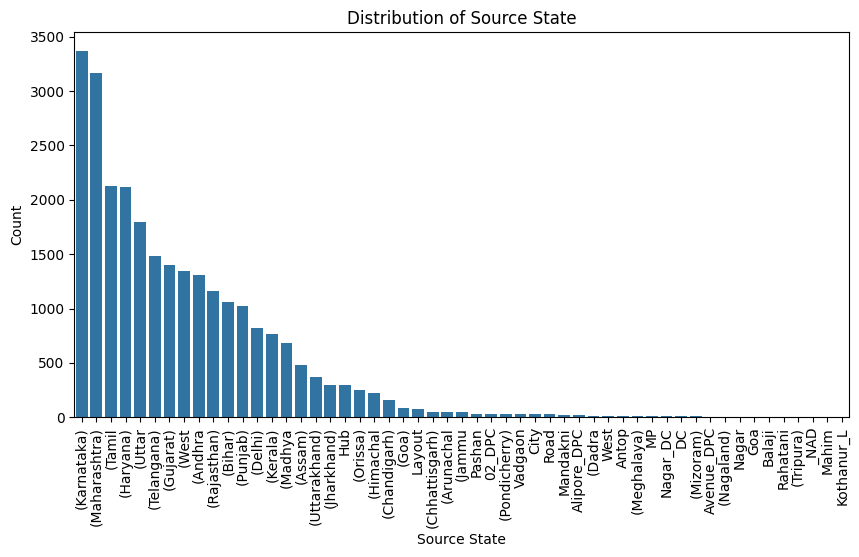

In [ ]:
#Source state with max orders
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x='source_State', data=segment, order=segment['source_State'].value_counts().index, ax=ax)
plt.xlabel('Source State')
plt.ylabel('Count')
plt.title('Distribution of Source State')
# Rotate x-axis labels using matplotlib.pyplot.xticks
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show()

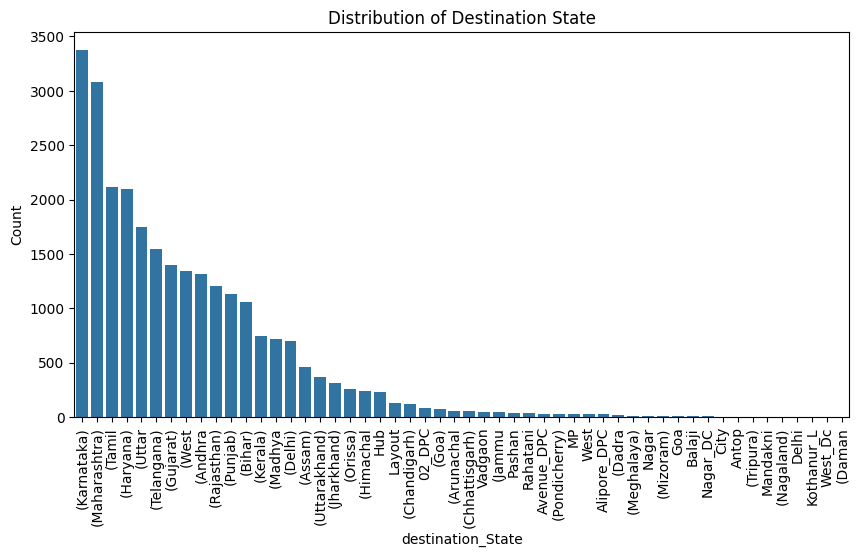

In [ ]:
#destination State with max orders
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x='destination_State', data=segment, order=segment['destination_State'].value_counts().index, ax=ax)
plt.xlabel('destination_State')
plt.ylabel('Count')
plt.title('Distribution of Destination State')
# Rotate x-axis labels using matplotlib.pyplot.xticks
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show()

In [ ]:
#Calculation of based on route_schedule_uuid no of cities passed, avg. distance, no. of trips and so on.
A = segment.groupby("route_schedule_uuid")["route_type"].unique().reset_index()
B = segment.groupby("route_schedule_uuid")['destination_City'].agg(lambda x: tuple(x.apply(tuple).unique())).reset_index()
B.columns = ["route_schedule_uuid", "destination_cities"]
C = segment.groupby("route_schedule_uuid")['source_City'].agg(lambda x: tuple(x.apply(tuple).unique())).reset_index()
C.columns = ["route_schedule_uuid", "source_cities"]
D = segment.groupby("route_schedule_uuid")['source_State'].agg(lambda x: tuple(x.unique())).reset_index()
D.columns = ["route_schedule_uuid", "source_states"]
E = segment.groupby("route_schedule_uuid")['destination_State'].agg(lambda x: tuple(x.unique())).reset_index()
E.columns = ["route_schedule_uuid", "destination_states"]
F = segment.groupby("route_schedule_uuid")[["source_State","destination_State"]].nunique().sort_values(by="source_State",ascending=False).reset_index()
F.columns = ["route_schedule_uuid","#source_states","#destination_states"]
G = segment.groupby("route_schedule_uuid")["actual_distance_to_destination"].mean().reset_index()
G.columns = ["route_schedule_uuid","Average_Actual_distance_to_destination"]
H = segment["route_schedule_uuid"].value_counts().reset_index()
H.columns = ["route_schedule_uuid","Number_of_Trips"]
I = segment.groupby("route_schedule_uuid")[["source_City","destination_City"]].agg(lambda x: tuple(x.apply(tuple).unique())).reset_index()
I = pd.DataFrame({
    "route_schedule_uuid": I["route_schedule_uuid"],
    "#source_cities": I["source_City"].apply(lambda x: len(set(x))), # Calculate the number of unique source cities
    "#destination_cities": I["destination_City"].apply(lambda x: len(set(x)))  # Calculate the number of unique destination cities
}).sort_values(by="#source_cities", ascending=False).reset_index(drop=True)

In [ ]:
#Merging all the above temp tables to build an overall table for fetching the desired results
route_records = I.merge(H.merge(G.merge(F.merge(E.merge(D.merge(C.merge(A.merge(B,
        on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer")

In [ ]:
#To check for the null values
route_records.isna().sum()

,0
route_schedule_uuid,0
#source_cities,0
#destination_cities,0
Number_of_Trips,0
Average_Actual_distance_to_destination,0
#source_states,0
#destination_states,0
destination_states,0
source_states,0
source_cities,0


In [ ]:
#Seggregating route type, source cities, destination cities, source states and destination states
route_records["route_type"] = route_records["route_type"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_cities"] = route_records["source_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["destination_cities"] = route_records["destination_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_states"] = route_records["source_states"].astype("str").str.strip("[]").str.replace("'","")
route_records["destination_states"] = route_records["destination_states"].astype("str").str.strip("[]").str.replace("'","")

In [ ]:
route_records.head(6)

,route_schedule_uuid,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df...,3,3,33,16.555241,1,1,"((Maharashtra),)","((Maharashtra),)","((B, h, i, w, a, n, d, i, , M, a, n, k, o, l, ...",Carting,"((M, u, m, b, a, i, , M, i, r, a, R, d, , I, P..."
1,thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a3...,1,1,9,29.857170,1,1,"((Karnataka),)","((Karnataka),)","((B, e, n, g, a, l, u, r, u, , H, o, o, d, i, ...",Carting,"((B, a, n, g, a, l, o, r, e, , N, e, l, m, n, ..."
2,thanos::sroute:00a74fab-a3ac-44df-b83a-cbf181b...,1,1,4,59.574924,1,1,"((Bihar),)","((Bihar),)","((N, a, u, g, c, h, i, a, , V, i, j, a, y, g, ...",FTL,"((K, h, a, g, a, r, i, a, , G, o, d, a, m, D, ..."
3,thanos::sroute:00b294b8-d2c3-4bca-a3be-684f462...,5,5,32,34.635043,1,1,"((West,)","((West,)","((K, a, t, w, a, , B, S, a, r, a, n, i, , D), ...",Carting,"((C, h, a, p, r, a, , N, a, g, a, r, D, P, P, ..."
4,thanos::sroute:01164881-301e-45f8-bacd-ee21c37...,3,4,33,47.174412,1,1,"((West,)","((West,)","((C, h, a, n, d, r, o, k, n, a, R, D, , C, e, ...",FTL,"((K, h, a, r, a, g, p, u, r, , D, C), (J, h, a..."
5,thanos::sroute:011f94ad-57cf-4005-9734-f5b8a4d...,5,5,80,40.740680,1,1,"((Telangana),)","((Telangana),)","((W, a, r, a, n, g, a, l, , H, u, n, t, e, r, ...",FTL,"((K, h, a, n, p, u, r, , N, r, s, a, m, p, t, ..."


In [ ]:
#From source to destination number of cities, trips, average actual distance and so on.
route_records["ROUTE"] = route_records["source_cities"] + " -- " + route_records["destination_cities"]
route_records.drop(["route_schedule_uuid"],axis = 1,inplace=True)
first_column = route_records.pop('ROUTE')
route_records.insert(0, 'ROUTE', first_column)
route_records["SourceToDestination_city"] = route_records["source_cities"].str.split(" ").apply(lambda x:x[0]) +" TO " +route_records["destination_cities"].str.split(" ").apply(lambda x:x[-1])
first_column = route_records.pop('SourceToDestination_city')
route_records.insert(0, 'SourceToDestination_city', first_column)
route_records.head(6)

,SourceToDestination_city,ROUTE,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,"((B, TO M))","((B, h, i, w, a, n, d, i, , M, a, n, k, o, l, ...",3,3,33,16.555241,1,1,"((Maharashtra),)","((Maharashtra),)","((B, h, i, w, a, n, d, i, , M, a, n, k, o, l, ...",Carting,"((M, u, m, b, a, i, , M, i, r, a, R, d, , I, P..."
1,"((B, TO H),)","((B, e, n, g, a, l, u, r, u, , H, o, o, d, i, ...",1,1,9,29.857170,1,1,"((Karnataka),)","((Karnataka),)","((B, e, n, g, a, l, u, r, u, , H, o, o, d, i, ...",Carting,"((B, a, n, g, a, l, o, r, e, , N, e, l, m, n, ..."
2,"((N, TO D),)","((N, a, u, g, c, h, i, a, , V, i, j, a, y, g, ...",1,1,4,59.574924,1,1,"((Bihar),)","((Bihar),)","((N, a, u, g, c, h, i, a, , V, i, j, a, y, g, ...",FTL,"((K, h, a, g, a, r, i, a, , G, o, d, a, m, D, ..."
3,"((K, TO D))","((K, a, t, w, a, , B, S, a, r, a, n, i, , D), ...",5,5,32,34.635043,1,1,"((West,)","((West,)","((K, a, t, w, a, , B, S, a, r, a, n, i, , D), ...",Carting,"((C, h, a, p, r, a, , N, a, g, a, r, D, P, P, ..."
4,"((C, TO D))","((C, h, a, n, d, r, o, k, n, a, R, D, , C, e, ...",3,4,33,47.174412,1,1,"((West,)","((West,)","((C, h, a, n, d, r, o, k, n, a, R, D, , C, e, ...",FTL,"((K, h, a, r, a, g, p, u, r, , D, C), (J, h, a..."
5,"((W, TO D))","((W, a, r, a, n, g, a, l, , H, u, n, t, e, r, ...",5,5,80,40.740680,1,1,"((Telangana),)","((Telangana),)","((W, a, r, a, n, g, a, l, , H, u, n, t, e, r, ...",FTL,"((K, h, a, n, p, u, r, , N, r, s, a, m, p, t, ..."


### Busiest routes

In [ ]:
#Which source city to destination city is the busiest city
segment['source_City'] = segment['source_City'].apply(lambda x: x[0] if isinstance(x, list) else x)
segment['destination_City'] = segment['destination_City'].apply(lambda x: x[0] if isinstance(x, list) else x)

#perform the groupby operation
Number_of_trips_between_cities = segment.groupby(["source_City","destination_City"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
Number_of_trips_between_cities.head(5)

,source_City,destination_City,trip_uuid
0,B,B,1854
1,M,M,741
2,B,M,655
3,M,B,449
4,C,C,408


In [ ]:
#Which source city to destination city is the busiest city excluding the same source_city and destination_city
Number_of_trips_between_cities.loc[Number_of_trips_between_cities["source_City"] != Number_of_trips_between_cities["destination_City"]].head(5)

,source_City,destination_City,trip_uuid
2,B,M,655
3,M,B,449
5,D,G,388
8,G,D,359
12,M,C,301


In [ ]:
#Discovering routes with maximum number of trips
route_records[["ROUTE","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by="Number_of_Trips",ascending=False).head(5)

,ROUTE,Number_of_Trips,Average_Actual_distance_to_destination,#source_cities,#destination_cities
1451,"((C, h, a, n, n, a, r, a, y, a, , p, a, t, n, ...",111,38.841356,7,7
1203,"((Z, a, h, i, r, a, b, a, d, , M, o, h, i, m, ...",107,53.636561,5,5
1176,"((M, e, d, a, k, , D, w, a, r, a, k, a, , D), ...",103,37.017640,6,6
283,"((S, r, i, k, a, k, u, l, a, m, , K, u, s, l, ...",100,34.228894,6,6
296,"((S, h, r, i, r, a, m, p, u, r, , D, a, v, k, ...",99,41.793278,7,7


### 3.4. Creation of time variables such as year, month and day.

In [ ]:
#Creation of new variables year, month and day from trip_creation_time
segment['trip_creation_time_year'] = segment['trip_creation_time'].dt.year
segment['trip_creation_time_month'] = segment['trip_creation_time'].dt.month
segment['trip_creation_time_day'] = segment['trip_creation_time'].dt.day

In [ ]:
#Displaying segment info for ensuring that the new variables have been created or not.
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26368 non-null  int64         
 1   segment_key                     26368 non-null  object        
 2   data                            26368 non-null  object        
 3   trip_creation_time              26368 non-null  datetime64[ns]
 4   route_schedule_uuid             26368 non-null  object        
 5   route_type                      26368 non-null  object        
 6   trip_uuid                       26368 non-null  object        
 7   source_center                   26368 non-null  object        
 8   source_name                     26368 non-null  object        
 9   destination_center              26368 non-null  object        
 10  destination_name                26368 non-null  object        
 11  od

The above dataset description shows the newly created variables such as trip_creation_time_year, trip_creation_time_month, and trip_creation_time_day.

## 4. In Depth Analysis

### 4.1. Grouping and Aggregating at Trip-level.

In [ ]:
#Creation of a dictonary in which each column and corresponding aggregated values first, last and sum.
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

}

In [ ]:
#performing aggregation based on the trip_uuid and then aggregating based on the create_trip_dict
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [ ]:
#Displaying the trip dataset
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [ ]:
actual_time = trip['actual_time'] #Defining actual_time for Hypothesis testing
osrm_time = trip['osrm_time'] #Defining osrm_time for Hypothesis testing
segment_actual_time_sum = trip['segment_actual_time_sum'] #Defining segment_actual_time_sum for Hypothesis testing
osrm_distance = trip['osrm_distance'] #Defining osrm_distance for Hypothesis testing
segment_osrm_distance_sum = trip['segment_osrm_distance_sum'] #Defining segment_osrm_distance_sum for Hypothesis testing
segment_osrm_time_sum = trip['segment_osrm_time_sum'] #Defining segment_osrm_time_sum for Hypothesis testing

#Displaying cumulative sum of actual_time and segment_actual_time which is displayed after the trip_uuid aggregation
trip[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


## 4.2 Outlier Detection & Treatment

### 4.2.a Find any existing outliers in numerical features

In [ ]:
#Identified the numerical columns
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_time_diff_hour']

### 4.2.b Visualize the outlier values using Boxplot.

<Axes: >

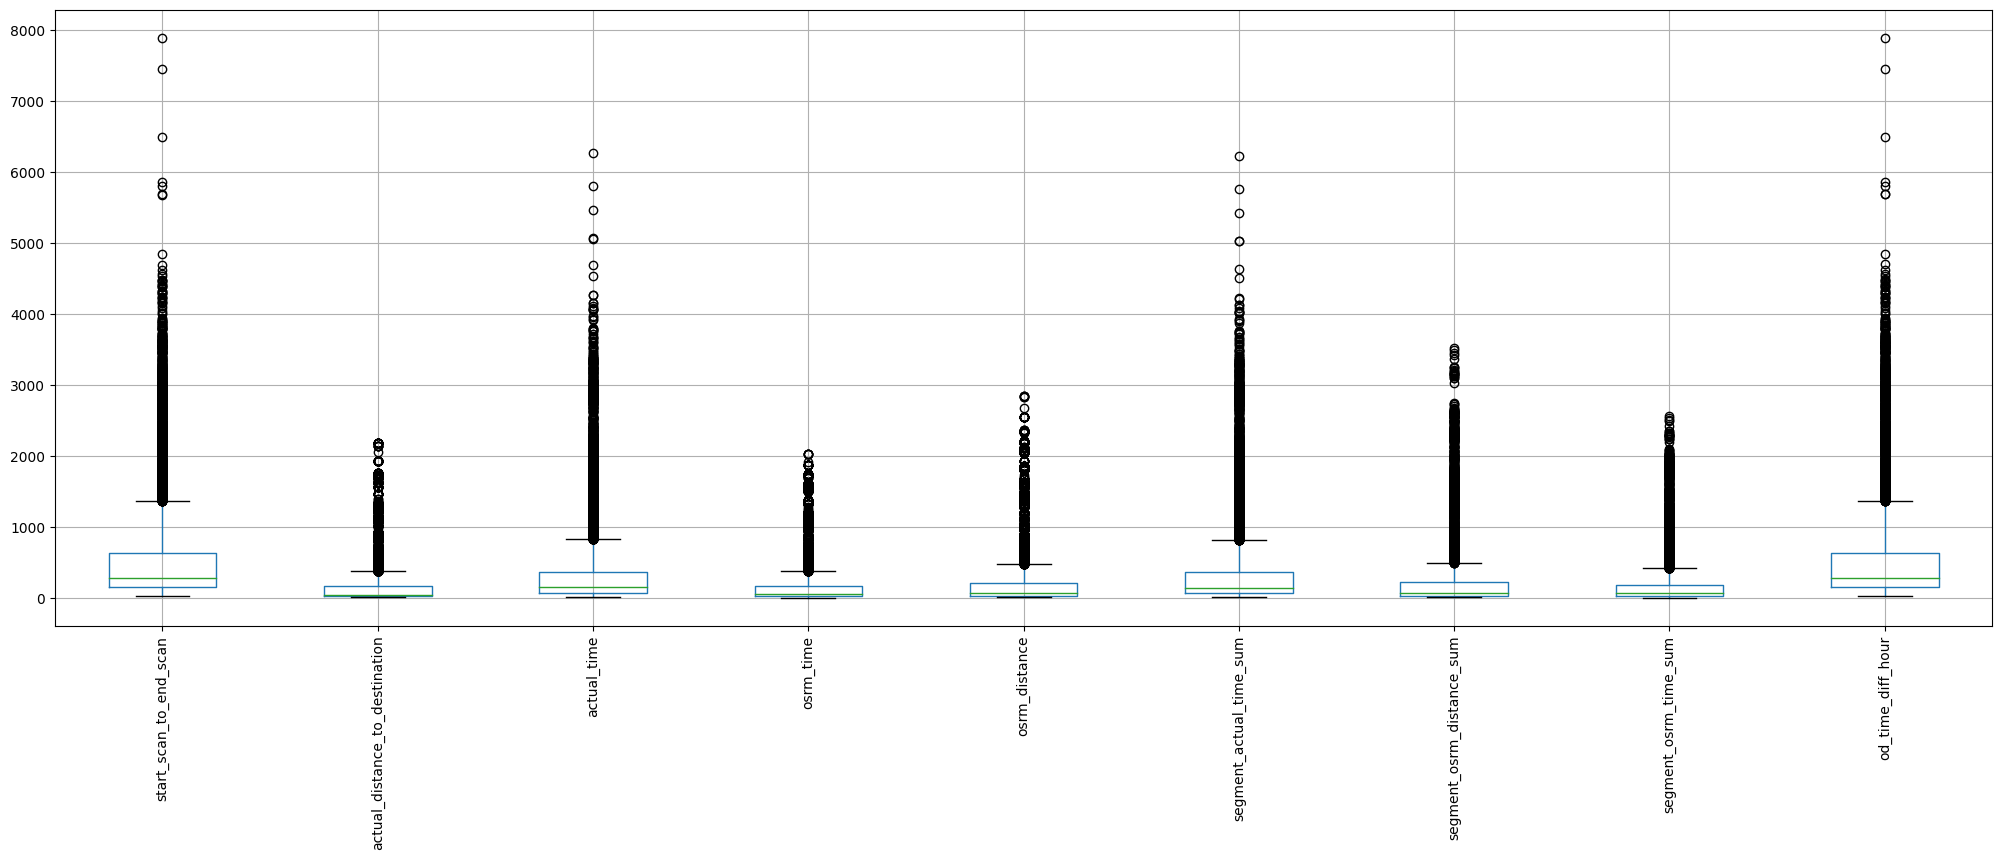

In [ ]:
#Displaying the box plot for numerical columns
trip[num_cols].boxplot(rot=90, figsize=(25,8))

All the above columns have outliers in it, and these outliers exists above the thresholds.

### 4.2.c Handle the outliers using the IQR method.

In [ ]:
#A funtion to detect the number of outliers above and below the thresholds
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    # Define lower and upper thresholds for outliers
    lower_threshold = q1 - 1.5 * IQR
    upper_threshold = q3 + 1.5 * IQR
    # Identify outliers
    lower_outliers = df[(df < lower_threshold)]
    upper_outliers = df[(df > upper_threshold)]
    # Return the number of outliers above and below the thresholds
    return lower_outliers.size, upper_outliers.size

In [ ]:
#Total number of outliers present above and below. Finally, the overall presence of outliers in the delhivery dataset
#outlier presence for start_scan_to_end_scan
x, y = find_outliers_IQR(trip['start_scan_to_end_scan'])
print("start_scan_to_end_scan Lower outliers                 : ", x)
print("start_scan_to_end_scan Upper outliers                 : ", y)
percentage_of_outliers = round((x+y)*100/trip.shape[0],2)
print("Percentage of start_scan_to_end_scan outliers         : ", percentage_of_outliers,'%')
#outlier presence for actual_distance_to_destination
x, y = find_outliers_IQR(trip['actual_distance_to_destination'])
print("actual_distance_to_destination users Lower outliers   : ", x)
print("actual_distance_to_destination users Upper outliers   : ", y)
percentage_of_outliers = round((x+y)*100/trip.shape[0],2)
print("Percentage of actual_distance_to_destination outliers : ", percentage_of_outliers,'%')
#outlier presence for actual_time
x, y = find_outliers_IQR(trip['actual_time'])
print("actual_time users Lower outliers                      : ", x)
print("actual_time users Upper outliers                      : ", y)
percentage_of_outliers = round((x+y)*100/trip.shape[0],2)
print("Percentage of actual_time outliers                    : ", percentage_of_outliers,'%')
#outlier presence for osrm_time
x, y = find_outliers_IQR(trip['osrm_time'])
print("osrm_time Lower outliers                              : ", x)
print("osrm_time Upper outliers                              : ", y)
percentage_of_outliers = round((x+y)*100/trip.shape[0],2)
print("Percentage of osrm_time outliers                      : ", percentage_of_outliers,'%')
#outlier presence for osrm_distance
x, y = find_outliers_IQR(trip['osrm_distance'])
print("osrm_distance Lower outliers                          : ", x)
print("osrm_distance Upper outliers                          : ", y)
percentage_of_outliers = round((x+y)*100/trip.shape[0],2)
print("Percentage of osrm_distance outliers                  : ", percentage_of_outliers,'%')
#outlier presence for segment_actual_time_sum
x, y = find_outliers_IQR(trip['segment_actual_time_sum'])
print("segment_actual_time_sum Lower outliers                : ", x)
print("segment_actual_time_sum Upper outliers                : ", y)
percentage_of_outliers = round((x+y)*100/trip.shape[0],2)
print("Percentage of segment_actual_time_sum outliers        : ", percentage_of_outliers,'%')
#outlier presence for segment_osrm_distance_sum
x, y = find_outliers_IQR(trip['segment_osrm_distance_sum'])
print("segment_osrm_distance_sum Lower outliers              : ", x)
print("segment_osrm_distance_sum Upper outliers              : ", y)
percentage_of_outliers = round((x+y)*100/trip.shape[0],2)
print("Percentage of segment_osrm_distance_sum outliers      : ", percentage_of_outliers,'%')
#outlier presence for segment_osrm_time_sum
x, y = find_outliers_IQR(trip['segment_osrm_time_sum'])
print("segment_osrm_time_sum Lower outliers                  : ", x)
print("segment_osrm_time_sum Upper outliers                  : ", y)
percentage_of_outliers = round((x+y)*100/trip.shape[0],2)
print("Percentage of segment_osrm_time_sum outliers          : ", percentage_of_outliers,'%')
#outlier presence for od_time_diff_hour
x, y = find_outliers_IQR(trip['od_time_diff_hour'])
print("od_time_diff_hour Lower outliers                      : ", x)
print("od_time_diff_hour Upper outliers                      : ", y)
percentage_of_outliers = round((x+y)*100/trip.shape[0],2)
print("Percentage of od_time_diff_hour outliers              : ", percentage_of_outliers,'%')

start_scan_to_end_scan Lower outliers                 :  0
start_scan_to_end_scan Upper outliers                 :  1267
Percentage of start_scan_to_end_scan outliers         :  8.55 %
actual_distance_to_destination users Lower outliers   :  0
actual_distance_to_destination users Upper outliers   :  1449
Percentage of actual_distance_to_destination outliers :  9.78 %
actual_time users Lower outliers                      :  0
actual_time users Upper outliers                      :  1643
Percentage of actual_time outliers                    :  11.09 %
osrm_time Lower outliers                              :  0
osrm_time Upper outliers                              :  1517
Percentage of osrm_time outliers                      :  10.24 %
osrm_distance Lower outliers                          :  0
osrm_distance Upper outliers                          :  1524
Percentage of osrm_distance outliers                  :  10.29 %
segment_actual_time_sum Lower outliers                :  0
segment_actua

### 4.3. One-hot encoding on categorical features.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(trip[['route_type']])

# Convert result back to DataFrame
trip_encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['route_type']))
trip['route_type_Carting'] = trip_encoded['route_type_Carting']
trip['route_type_FTL'] = trip_encoded['route_type_FTL']
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  object        
 4   trip_uuid                       14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  od_time_diff_hour               14817 non-null  float64       
 11  ac

There's only one field that is in the form of categorical datatype which is route_type. This has to be converted via one hot encoding. The above result shows that 2 new columns has been created route_type_Carting and route_type_FTL after one hot encoding of the column named route_type.

### 4.3. Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [ ]:
#All the numerical columns has been identified and stored in a variable called num_cols. We further use standard scaler function of sklearn.preprocessing to convert all the numerical columns into standardised columns using Standard Scaler function.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trip[num_cols])
trip[num_cols] = scaler.transform(trip[num_cols])
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,2.623702,2.162092,2.146251,2.047585,2.124848,2.146791,2.633784,2.629468,2.623393
1,-0.532593,-0.298944,-0.381461,-0.344144,-0.321920,-0.382742,-0.333670,-0.368643,-0.531362
2,5.165134,5.772935,5.325931,5.817598,5.804050,5.310954,5.573660,5.595785,5.164582
3,-0.654047,-0.482362,-0.531093,-0.539462,-0.498578,-0.530163,-0.488040,-0.524430,-0.654482
4,0.282670,-0.121257,-0.028757,-0.163566,-0.155387,-0.024976,-0.183405,-0.209676,0.283300
...,...,...,...,...,...,...,...,...,...
14812,-0.415693,-0.349454,-0.488341,-0.366255,-0.353368,-0.488813,-0.380078,-0.378181,-0.415376
14813,-0.714774,-0.487802,-0.598784,-0.550518,-0.508275,-0.598480,-0.497133,-0.540327,-0.715049
14814,-0.166711,-0.411926,-0.133856,-0.417849,-0.392677,-0.131047,-0.283991,-0.295518,-0.166318
14815,-0.279057,-0.097433,-0.165920,0.064919,-0.089730,-0.172397,0.000795,0.127333,-0.278039


The above table shows the standardised columns of the delhivery dataset.

### 5. Hypothesis Testing

### 5.1 Hypotheisis testing on actual_time aggregated value and OSRM time aggregated value.

H0: Mean of OSRM time >= Mean of Actual time taken to complete delivery.

Ha: Mean of OSRM time < Mean of Actual time taken to complete delivery.

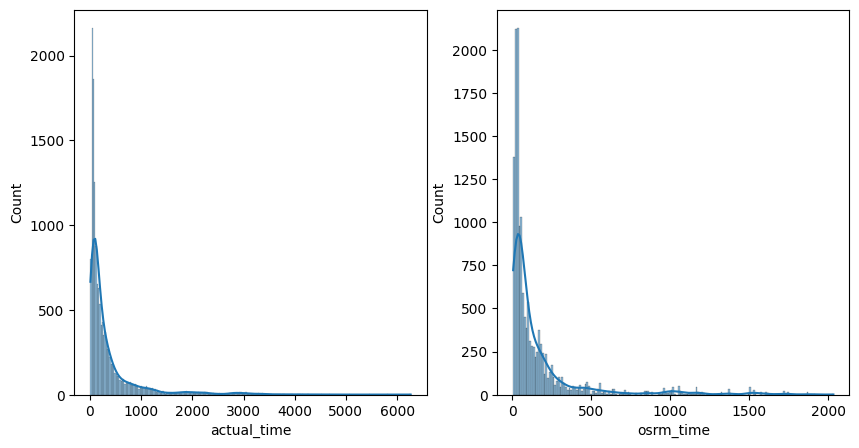

In [ ]:
# Assuming actual_time and osrm_time are your data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(actual_time, kde=True, ax=ax[0])
sns.histplot(osrm_time, kde=True, ax=ax[1])

plt.show()

In [ ]:
tstat, p_value = ttest_ind(actual_time, osrm_time)

In [ ]:
#Condition to accept or reject null hypothesis
if p_value < 0.05:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Reject H0, Mean of OSRM time < Mean of Actual time taken to complete delivery.")
else:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Failed to reject H0, Mean of OSRM time >= Mean of Actual time taken to complete delivery.")

t-statistic :  38.215453905833165
p-value     :  0.0
Reject H0, Mean of OSRM time < Mean of Actual time taken to complete delivery.


In [ ]:
#Calculating the actual mean time and osrm mean time
print(osrm_time.mean())
print(actual_time.mean())

161.3840183572923
357.143753796315


<B>The above two sample ttest we can conclude that population mean actual time taken to complete delivert from source to warehouse and orsm estimate mean time for population are not same. In addition, actual time is higher than the osrm estimated time for delivery.

### 5.2 actual_time aggregated value and segment actual time aggregated value.

H0: Actual time = segment actual time.

Ha: Actual time != segment actual time.

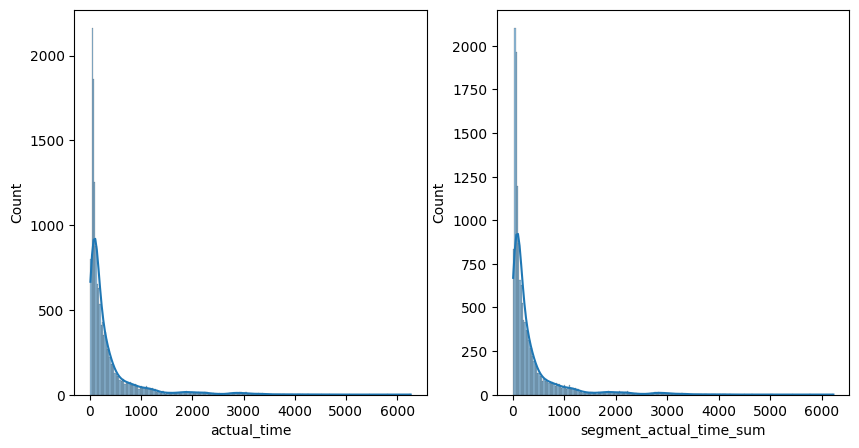

In [ ]:
# Assuming actual_time and segment_actual_time_sum are your data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(actual_time, kde=True, ax=ax[0])
sns.histplot(segment_actual_time_sum, kde=True, ax=ax[1])

plt.show()

In [ ]:
tstat, p_value = ttest_ind(actual_time, segment_actual_time_sum)

In [ ]:
#Condition to accept or reject null hypothesis
if p_value < 0.05:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Reject H0, Actual time != segment actual time.")
else:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Failed to reject H0, Actual time = segment actual time.")

t-statistic :  0.5008024728897531
p-value     :  0.6165138648224772
Failed to reject H0, Actual time = segment actual time.


<B> The above two sample ttest conclude's that Population average for Actual Time taken to complete delivery trip and segment actual time are same.

### 5.3 OSRM distance aggregated value and segment OSRM distance aggregated value.

H0 : Segment OSRM distance <= OSRM distance.

Ha : Segment OSRM distance > OSRM distance.

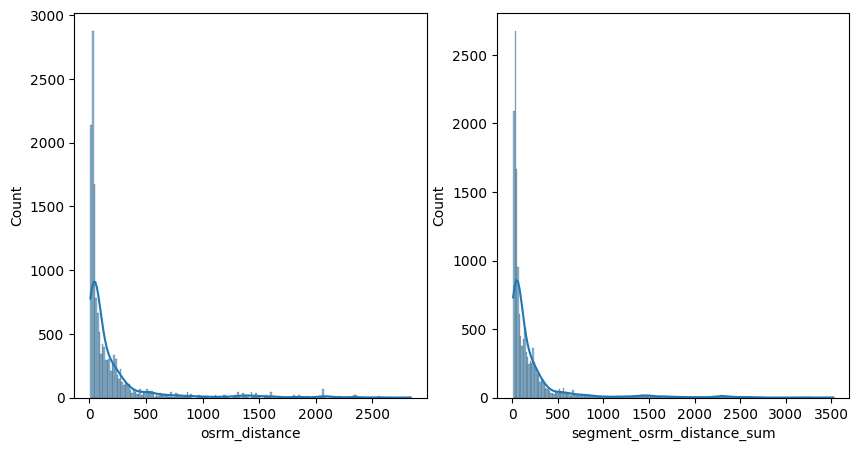

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(osrm_distance, kde=True, ax=ax[0])
sns.histplot(segment_osrm_distance_sum, kde=True, ax=ax[1])

plt.show()

In [ ]:
ttest, p_value = ttest_ind(osrm_distance, segment_osrm_distance_sum, alternative='less')

In [ ]:
#Condition to accept or reject null hypothesis
if p_value < 0.05:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Reject H0, Segment OSRM distance > OSRM distance.")
else:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Failed to reject H0, Segment OSRM distance <= OSRM distance.")

t-statistic :  0.5008024728897531
p-value     :  1.921315736676859e-05
Reject H0, Segment OSRM distance > OSRM distance.


<B> The two sample one sided ttest concludes that Average of osrm distance for population is less than average of segment osrm distance</B>

### 5.4 OSRM time aggregated value and segment OSRM time aggregated value.

Ho: segment osrm time <= OSRM time.

Ha: segment osrm time > OSRM time.

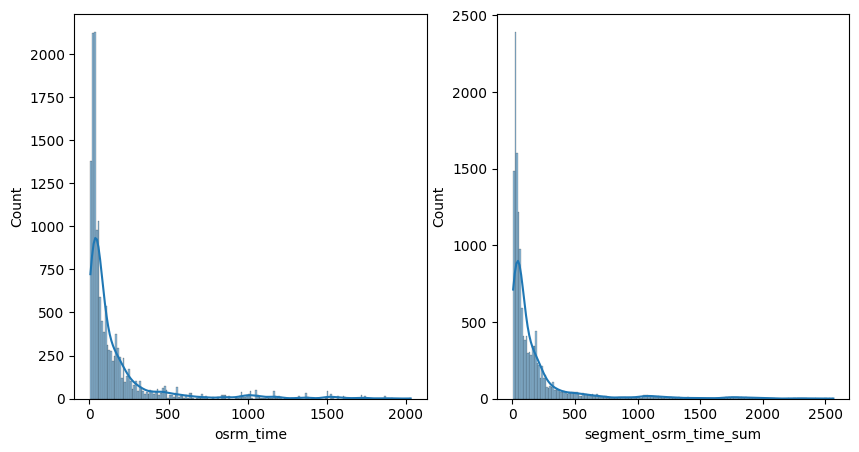

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(osrm_time, kde=True, ax=ax[0])
sns.histplot(segment_osrm_time_sum, kde=True, ax=ax[1])
plt.show()

In [ ]:
ttest, p_value = ttest_ind(osrm_time, segment_osrm_time_sum, alternative='less')

In [ ]:
#Condition to accept or reject null hypothesis
if p_value < 0.05:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Reject H0, segment osrm time > OSRM time.")
else:
  print('t-statistic : ', tstat)
  print('p-value     : ', p_value)
  print("Failed to reject H0, segment osrm time <= OSRM time")

t-statistic :  0.5008024728897531
p-value     :  4.978213399109586e-09
Reject H0, segment osrm time > OSRM time.


<B> from the above ttest , we can conclude that Population Mean osrm time is less than Population Mean segment osrm time. In other words, segment osrm time is greater than osrm time.<B>

## 6. Business Insights

> The top source state with maximum orders placed and maximum orders recived is the same and it is Karnataka, followed by Maharashtra.

> Busiest source to destination city code is from B to B with trip_uuid is 1854. (We need further investigation for understanding the city code).

> Busiest source to destination city code is excluding same start and destination city is from B to M with trip_uuid is 655.

> The busiest route is ((C, h, a, n, n, a, r, a, y, a, , p, a, t, n, ... etc.)	with a maximum of 111	and Average_Actual_distance_to_destination 38.841356